# Class Yapılarının Verilere Uygulanması

In [ ]:
#kullanılacak veriler:
# Classifier için hmelq datası(class yapısında kullanırken Cf olarak belirtecegim)
# Regressor için finans datası(class yapısında kullanırken Rg olarak belirteceğim)

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
import pandas as pd
import numpy as np
from pandas import Series , DataFrame
dataFrame= pd.read_csv("hmelq.csv")
data=dataFrame.copy()
data=data.dropna()
dm=pd.get_dummies(data[['reason','job']])
y=data['bad']
x_=data.drop(['reason','job','bad'],axis=1).astype('float64')
X=pd.concat([x_,dm],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [18]:
dataFrame= pd.read_excel( 'HW_Data_Set.xlsx', sheet_name = 'Sheet1')
data=dataFrame.copy()
colum=data.columns
dms= pd.get_dummies(data['ind_109'])
dms.head()
X_=data.drop(['ind_109'],axis=1)
X_.head()
data=pd.concat([X_,dms], axis=1)
data=data.replace('?',np.nan)
data = data.dropna(axis=0, subset=['ind_420'])
data = data.dropna(axis=0, subset=['ind_422'])
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42,shuffle= False)
#finans datasında shuffle=False olarak kullanıyoruz

In [1]:
import pandas as pd
import numpy as np
from pandas import Series , DataFrame

class info:
   
    def __init__(self,data):
        
        print(data.head())
        return data.info()
    def describe(self,data):
        return data.describe()

    def null(self,data):#çalışmıyor bak
        print(data.isnull().sum())
    def drop(self,data):
        print(data.dropna().isnull().sum())
    def categorize(self,data):
        kat_df = data.select_dtypes(include = ["object"])#type object olan değişkenleri bulur
        print(kat_df.head())
        

In [21]:
#hmelq datası
cf=info(data)
cf.describe(data)

     bad   loan   mortdue     value   reason  job   yoj  derog  delinq  \
153    0  18200   94727.0  136877.0  DebtCon  Mgr  15.0    0.0     0.0   
154    0  21700   79240.0   96784.0  DebtCon  Mgr   5.0    0.0     0.0   
155    0  34100  241931.0   36486.0  DebtCon  Mgr   1.0    0.0     2.0   
156    0   8400   62989.0   76718.0  HomeImp  Mgr   3.0    0.0     2.0   
157    0  17400   25859.0   43684.0  DebtCon  Mgr  16.0    1.0     0.0   

      clage  ninq  clno  debtinc  
153  168.96   2.0  26.0   36.056  
154   64.51   6.0  24.0   38.079  
155  196.01   3.0  50.0   42.459  
156  131.47   0.0  22.0   29.200  
157   95.36   1.0  17.0   27.108  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,0.088206,19010.257681,76337.035183,106899.244797,9.003964,0.150149,0.264123,180.645020,1.037661,22.265114,34.105829
std,0.283665,10768.607345,44476.368189,54026.707096,7.573012,0.580421,0.789816,84.420116,1.578414,9.457238,8.438411
min,0.000000,1700.000000,5076.000000,23031.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,4.030000
25%,0.000000,12000.000000,49577.250000,71287.250000,3.000000,0.000000,0.000000,118.205000,0.000000,16.000000,29.295500
50%,0.000000,16900.000000,67595.000000,94514.000000,7.000000,0.000000,0.000000,176.670000,0.000000,21.000000,34.949000
75%,0.000000,23600.000000,92922.750000,121220.750000,13.000000,0.000000,0.000000,229.692500,2.000000,27.000000,38.952000
max,1.000000,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.230000,13.000000,64.000000,144.189000


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

class Visualization:
   
    
    def __init__(self,data):
        self.data=data
    def scatplot(self, data1, data2, xlabel=None, ylabel=None):
        plt.figure(figsize=(10,6))
        plt.scatter(data1, data2)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    def histogram(self, data):
        sns.distplot(data)
        plt.show()      
    def boxplot(self,data):
        sns.boxplot(x=data)
    def pairplot(self,data):
        sns.pairplot(data)

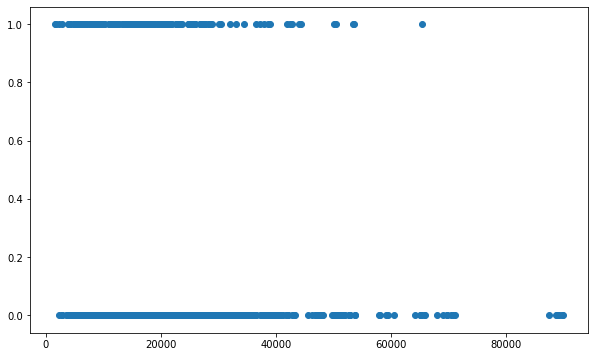

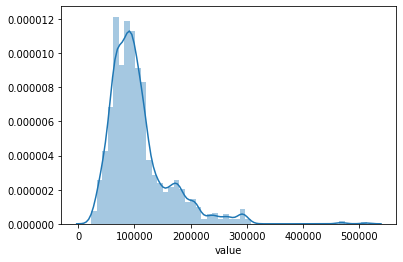

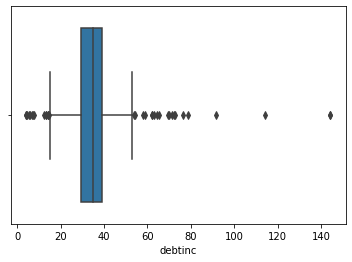

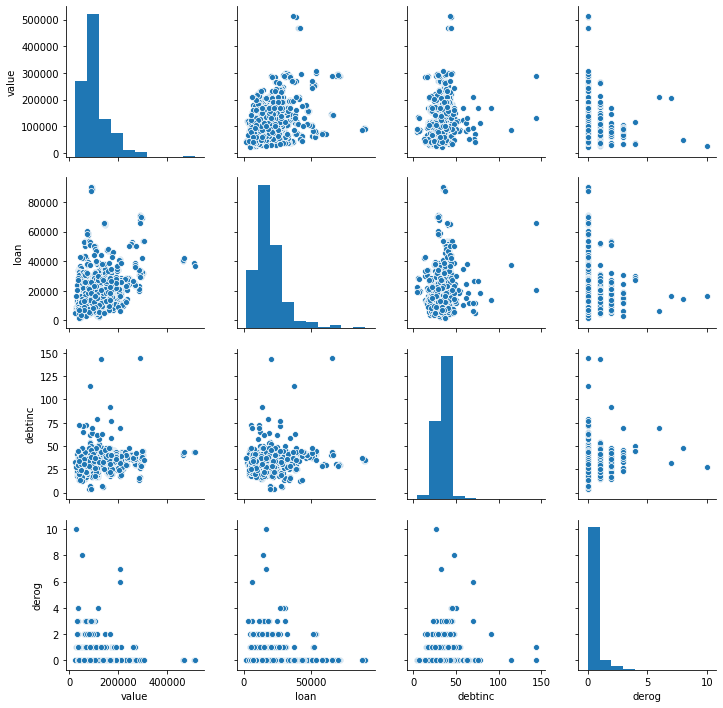

In [28]:
cf=Visualization(data)
cf.scatplot(data['loan'],data['bad'],xlabel=None, ylabel=None)
cf.histogram(data['value'])
cf.boxplot(data['debtinc'])
cf.pairplot(data[['value','loan','debtinc','derog']])

In [3]:
import pandas as pd
import numpy as np
from pandas import Series , DataFrame
class Variable:
   
    def __init__(self,data):
        self.data=data
    
        
    def getdummy(self,data):
         dms=pd.get_dummies(data)
         
         print(dms.head())
         X_=data.drop(data, axis=1)
         print(X_.head())
         data=pd.concat([X_,dms],axis=1)
        
    def target(self,data):
        y=data(data)
        X_=data.drop(data,axis=1)
        print(X.head())
    

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
class PCAnalize:
    
   
    def __init__(self,data):
        self.data=data
    def standart(self,data):
        scaler = StandardScaler()
        scaler.fit(X) 
        
    def  pcamodel(self,data):
        
        pca=PCA()
        pca.fit_transform(X_train)
        a=np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:15]
        print('değişkenlerin kümülatif açıklanma oranları', a)
    
        features = range(pca.n_components_)
        plt.bar(features, pca.explained_variance_ratio_, color='black')
        plt.xlabel('PCA features')
        plt.ylabel('variance %')
        plt.xticks(features)
         

In [ ]:
#yalnızca target datasına uygulanabilir

In [5]:
import statsmodels.api as sm
class LinearRegression:
    def __init__(self,data):
        self.data=data
    def statsmodel(self,data):
        lm = sm.OLS(y,X)
        model = lm.fit()
        print(model.summary())
    def olsmodel(self,data):
        import statsmodels.formula.api as smf
        lm = smf.ols("y ~ X", data)
        model = lm.fit()
        print(model.summary())
    def linearFit(self,data):
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression()
        model = reg.fit(X, y)
        print('model intercept: ',model.intercept_)
        print('model coef: ',model.coef_)
        print('model score:',model.score(X,y))
        print('ilk 10 değişken için model predict: ',model.predict(X)[0:10])

In [ ]:
#yalnızca target datasına uygulanabilir

In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import scipy.stats as stats
class LojistikRegresyon:
    def __init__(self,data):
        self.data=data
    def LojRegresyon(self,data):
        loj=sm.Logit(y_train,X_train)
        loj_model=loj.fit()
        print(loj_model.summary())
        logistic_regression= LogisticRegression()
        model=logistic_regression.fit(X_train,y_train)
        y_pred =model.predict(X_test)
        print(classification_report(y_test,y_pred))
        

In [52]:
cf=LojistikRegresyon(data)
cf.LojRegresyon(data)

Optimization terminated successfully.
         Current function value: 0.236872
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:                 1513
Model:                          Logit   Df Residuals:                     1496
Method:                           MLE   Df Model:                           16
Date:                Sun, 23 Aug 2020   Pseudo R-squ.:                  0.2280
Time:                        14:11:29   Log-Likelihood:                -358.39
converged:                       True   LL-Null:                       -464.26
Covariance Type:            nonrobust   LLR p-value:                 3.330e-36
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -2.145e-05   1.19e-05     -1.798      0.072   -4.48e-05    1.94e-06
mortdue        -1

C:\Users\karde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
class DecisionTree:
    from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
    from sklearn.metrics import mean_squared_error, r2_score
   
    def __init__(self,data):
        self.data=data
    def CartRegressor(self,data):
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.tree import DecisionTreeRegressor
        cart_model = DecisionTreeRegressor()
        cart_model.fit(X_train, y_train)
        y_pred =cart_model.predict(X_test)
        sqrt= np.sqrt(mean_squared_error(y_test, y_pred))
        print("Cart Regressor Model Squared Error: ",sqrt)
        
    def CartRegressorTuned(self,data):
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.tree import DecisionTreeRegressor
        cart_model = DecisionTreeRegressor()
        
        
        cart_params = {"max_leaf_nodes": range(4,8),
                       "min_samples_leaf": [10,15,20],
                       "min_samples_split": range(10,50) }
        
        cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
        cart_cv_model.fit(X_train, y_train)
        print("model için best parametreler :" ,cart_cv_model.best_params_)
        params=cart_cv_model.best_params_
        cart_tuned = DecisionTreeRegressor(min_samples_split=params['min_samples_split'],
                                           min_samples_leaf=params['min_samples_leaf'],
                                           max_leaf_nodes=params['max_leaf_nodes'])
        cart_tuned.fit(X_train, y_train)
        y_pred =cart_tuned.predict(X_test)
        sqrt2= np.sqrt(mean_squared_error(y_test, y_pred))
        print("Cart Regressor Model Squared Error: ",sqrt2)
        
        
    def CartClassifier(self,data):
        from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.tree import DecisionTreeClassifier
        cart_model = DecisionTreeClassifier()
        cart_model.fit(X_train, y_train)
        y_pred =cart_model.predict(X_test)
        sqrt= np.sqrt(mean_squared_error(y_test, y_pred))
        print("Cart Classifier Model Squared Error: ",sqrt)
        print("Cart Classifier Model Accuracy: ",accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
    
              
    def CartClassifierTuned(self,data):
        from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.tree import DecisionTreeClassifier
        cart_model = DecisionTreeClassifier()
        
        
        cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }
        
        cart_cv_model = GridSearchCV(cart_model, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
        cart_cv_model.fit(X_train, y_train)
        print("model için best parametreler :" ,cart_cv_model.best_params_)
        params=cart_cv_model.best_params_
        cart_tuned = DecisionTreeClassifier(min_samples_split=params['min_samples_split'],
                                           min_samples_leaf=params['max_depth'])
                                          
        cart_tuned.fit(X_train, y_train)
        y_pred =cart_tuned.predict(X_test)
        sqrt2= np.sqrt(mean_squared_error(y_test, y_pred))
        print("Cart Regressor Model Squared Error: ",sqrt2)
        print("Cart Classifier Model Tuned Accuracy: ",accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))

In [30]:
cf=DecisionTree(data)
cf.CartClassifier(data)
cf.CartClassifierTuned(data)

Cart Classifier Model Squared Error:  0.25172671021102105
Cart Classifier Model Accuracy:  0.9366336633663367
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       466
           1       0.64      0.41      0.50        39

    accuracy                           0.94       505
   macro avg       0.80      0.70      0.73       505
weighted avg       0.93      0.94      0.93       505

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 487 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 1705 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 3403 tasks      | elapsed:   14.3s


model için best parametreler : {'max_depth': 2, 'min_samples_split': 37}
Cart Regressor Model Squared Error:  0.23122574799241857
Cart Classifier Model Tuned Accuracy:  0.9465346534653465
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       466
           1       0.69      0.56      0.62        39

    accuracy                           0.95       505
   macro avg       0.83      0.77      0.80       505
weighted avg       0.94      0.95      0.94       505



[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   18.0s finished


In [53]:
class RandomForest:
    def __init__(self,data):
        self.data=data
        
    def RandomForestRegressor(self,data):
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from sklearn.metrics import mean_squared_error, r2_score
        import matplotlib.pyplot as plt
        from sklearn.ensemble import RandomForestRegressor
        rf_model = RandomForestRegressor(random_state = 42)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        print("Random Forest Regressor Model MSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
        Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)
        Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

        plt.xlabel("Değişken Önem Düzeyleri")
        
    def RandomForestRegressorTuned(self,data):
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from sklearn.metrics import mean_squared_error, r2_score
        import matplotlib.pyplot as plt
        from sklearn.ensemble import RandomForestRegressor
        rf_model = RandomForestRegressor(random_state = 42)
        rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}
        rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
        rf_cv_model.fit(X_train, y_train)
        params= rf_cv_model.best_params_
        rf_tuned = RandomForestRegressor(max_depth  = params['max_depth'], 
                                 max_features = params['max_features'], 
                                 n_estimators = params['n_estimators'])
        rf_tuned.fit(X_train, y_train)
        y_pred = rf_tuned.predict(X_test)
        print("Random Forest Regressor Model Tuned MSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
        Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)
        Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

        plt.xlabel("Değişken Önem Düzeyleri")
        
        
    def RandomForestClassifier(self,data):
        from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from sklearn.metrics import mean_squared_error, r2_score
        import matplotlib.pyplot as plt
        from sklearn.ensemble import RandomForestClassifier
        rf_model = RandomForestClassifier(random_state = 42)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        print("Random Forest Classifier Model MSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
        print("Random Forest Classifier Model  Accuracy: ",accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)
        Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

        plt.xlabel("Değişken Önem Düzeyleri")
        
    def RandomForestClassifierTuned(self,data):
        from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from sklearn.metrics import mean_squared_error, r2_score
        import matplotlib.pyplot as plt
        from sklearn.ensemble import RandomForestClassifier
        rf_model = RandomForestClassifier(random_state = 42)
        rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}
        rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
        rf_cv_model.fit(X_train, y_train)
        params= rf_cv_model.best_params_
        rf_tuned = RandomForestClassifier(max_depth  = params['max_depth'], 
                                 max_features = params['max_features'], 
                                 n_estimators = params['n_estimators'])
        rf_tuned.fit(X_train, y_train)
        y_pred = rf_tuned.predict(X_test)
        print("Random Forest Classifier Model Tuned MSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
        print("Random Forest Classifier Model  Accuracy: ",accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)
        Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

        plt.xlabel("Değişken Önem Düzeyleri")

C:\Users\karde\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Random Forest Classifier Model MSE: 0.20872076187012054
Random Forest Classifier Model  Accuracy:  0.9564356435643564
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       466
           1       1.00      0.44      0.61        39

    accuracy                           0.96       505
   macro avg       0.98      0.72      0.79       505
weighted avg       0.96      0.96      0.95       505

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 19.3min finished


Random Forest Classifier Model Tuned MSE: 0.2134117017772117
Random Forest Classifier Model  Accuracy:  0.9544554455445544
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       466
           1       0.94      0.44      0.60        39

    accuracy                           0.95       505
   macro avg       0.95      0.72      0.79       505
weighted avg       0.95      0.95      0.95       505



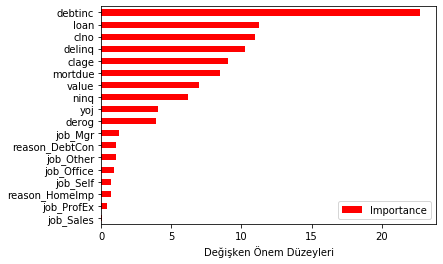

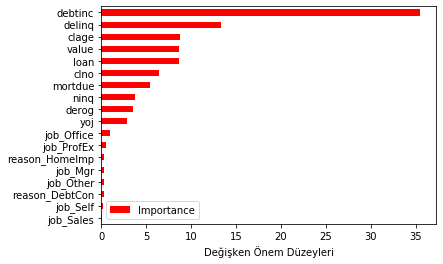

In [54]:
cf=RandomForest(data)
cf.RandomForestClassifier(data)
cf.RandomForestClassifierTuned(data)

In [2]:
import pandas as pd
import numpy as np
from pandas import Series , DataFrame
dataFrame= pd.read_csv("hmelq.csv")
data=dataFrame.copy()
data=data.dropna()
dm=pd.get_dummies(data[['reason','job']])
y=data['bad']
x_=data.drop(['reason','job','bad'],axis=1).astype('float64')
X=pd.concat([x_,dm],axis=1)

In [14]:
class NeuralNetwork:
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
    scaler = StandardScaler()
    scaler.fit(X)
    
    def __init__(self,data):
        self.data=data
    def NeuralRegressor(self,data):
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from sklearn.neural_network import MLPRegressor
        from sklearn.metrics import mean_squared_error, r2_score
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)
        
        mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train, y_train)
        y_pred = mlp_model.predict(X_test)
        print("Neural Network Regressor Modeli MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        
    def NeuralRegressorTuned(self,data):
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.neural_network import MLPRegressor
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)
        mlp_model = MLPRegressor(hidden_layer_sizes = (100,20))
        mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}
        
        mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)
        mlp_cv_model.fit(X_train, y_train)
        params=mlp_cv_model.best_params_
        mlp_tuned = MLPRegressor(alpha = params['alpha'], 
                                 hidden_layer_sizes =params['hidden_layer_sizes'],
                                 activation=params['activation'])
        mlp_tuned.fit(X_train, y_train)
        y_pred = mlp_tuned.predict(X_test)
        print("Neural Network Regressor Modeli Tuned MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        
        
        
    def NeuralClassifier(self,data):
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from sklearn.neural_network import MLPClassifier
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)
        
        mlp_model = MLPClassifier(hidden_layer_sizes = (100,20)).fit(X_train, y_train)
        y_pred = mlp_model.predict(X_test)
        print("Neural Network Classifier Modeli MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        print("Neural Network Classifier Model  Accuracy: ",accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        
    def NeuralClassifierTuned(self,data):
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.neural_network import MLPClassifier
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)
        mlp_model = MLPClassifier(hidden_layer_sizes = (100,20))
        mlpc_params = {"alpha": [0.1, 0.01, 0.02],
              "hidden_layer_sizes": [(10,10,10),
                                     (3,5),(5, 3),
                                     (100,100,100),
                                     (100,100)],
                                     
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

        
        mlp_cv_model = GridSearchCV(mlp_model, mlpc_params, cv = 10)
        mlp_cv_model.fit(X_train, y_train)
        params=mlp_cv_model.best_params_
        mlp_tuned = MLPClassifier(alpha = params['alpha'], 
                                 hidden_layer_sizes =params['hidden_layer_sizes'],
                                 activation=params['activation'],
                                 solver=params['solver']).fit(X_train, y_train)
        y_pred = mlp_tuned.predict(X_test)
        print("Neural Network Classifier Modeli Tuned MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        print("Neural Network Classifier Model  Accuracy: ",accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))

In [12]:

cf.NeuralClassifier(data)

Neural Network Classifier Modeli MSE:  0.27431282279994723
Neural Network Classifier Model  Accuracy:  0.9247524752475248
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       466
           1       0.60      0.08      0.14        39

    accuracy                           0.92       505
   macro avg       0.76      0.54      0.55       505
weighted avg       0.90      0.92      0.90       505



C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
cf=NeuralNetwork(data)
cf.NeuralClassifierTuned(data)

C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Neural Network Classifier Modeli Tuned MSE:  0.27789876353139326
Neural Network Classifier Model  Accuracy:  0.9227722772277228
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       466
           1       0.00      0.00      0.00        39

    accuracy                           0.92       505
   macro avg       0.46      0.50      0.48       505
weighted avg       0.85      0.92      0.89       505



C:\Users\karde\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
class NaiveBayes:
    def __init__(self,data):
        self.data=data
    def NaiveModel(self,data):
        from sklearn.naive_bayes import GaussianNB
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
        nb = GaussianNB()
        nb_model = nb.fit(X_train, y_train)
        nb_model
        y_pred = nb_model.predict(X_test)
        print("Naive Bayes Modeli Accuracy Score:",accuracy_score(y_test, y_pred))
        print("Cross Validation Score Mean:",cross_val_score(nb_model, X_test, y_test, cv = 10).mean())
        print(classification_report(y_test, y_pred))

In [55]:
#Yalnızca hmelq datasında kullanılır
cf= NaiveBayes(data)
cf.NaiveModel(data)

Naive Bayes Modeli Accuracy Score: 0.904950495049505
Cross Validation Score Mean: 0.9307418967587034
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       466
           1       0.32      0.21      0.25        39

    accuracy                           0.90       505
   macro avg       0.63      0.58      0.60       505
weighted avg       0.89      0.90      0.90       505



In [11]:
class GBM:
   
    def __init__(self,data):
        self.data=self
    
        
    def GBMRegressorModel(self,data):
        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.metrics import mean_squared_error, r2_score
        import matplotlib.pyplot as plt
        gbm_model = GradientBoostingRegressor()
        gbm_model.fit(X_train, y_train)
        y_pred = gbm_model.predict(X_test)
        print("GBM Regressor Model MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    
    def GBMRegressorModelTuned(self,data):
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.metrics import mean_squared_error, r2_score
        import matplotlib.pyplot as plt
        
        gbm_params = { 'learning_rate': [0.001, 0.01, 0.1, 0.2],
            'max_depth': [3, 5, 8,50,100],
            'n_estimators': [200, 500, 1000, 2000],
            'subsample': [1,0.5,0.75],}
        gbm = GradientBoostingRegressor()
        gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
        gbm_cv_model.fit(X_train, y_train)
        params=gbm_cv_model.best_params_
        gbm_tuned = GradientBoostingRegressor(learning_rate = params['learning_rate'],  
                                      max_depth =params['max_depth'] , 
                                      n_estimators =params['n_estimators'] , 
                                      subsample = params['subsample'])

        gbm_tuned = gbm_tuned.fit(X_train,y_train)
        y_pred = gbm_tuned.predict(X_test)
        print("GBM Regressor Model Tuned MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
   
        Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)
        Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

        plt.xlabel("Değişken Önem Düzeyleri")

        
    def GBMClassifierModel(self,data):
        from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
        from sklearn.ensemble import GradientBoostingClassifier
        from sklearn.metrics import mean_squared_error, r2_score
        import matplotlib.pyplot as plt
        gbm_model = GradientBoostingClassifier()
        gbm_model.fit(X_train, y_train)
        y_pred = gbm_model.predict(X_test)
        print("GBM Classifier Model MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        print(classification_report(y_test, y_pred))
    
    def GBMClassifierModelTuned(self,data):
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
        from sklearn.ensemble import GradientBoostingClassifier
        from sklearn.metrics import mean_squared_error, r2_score
        import matplotlib.pyplot as plt
        
        gbm_params = { 'learning_rate': [ 0.01, 0.1, 0.2],
            'max_depth': [3, 5, 8,50,100],
            'n_estimators': [200, 500, 1000],
            'subsample': [1,0.5,0.75],}
        gbm = GradientBoostingClassifier()
        gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
        gbm_cv_model.fit(X_train, y_train)
        params=gbm_cv_model.best_params_
        gbm_tuned = GradientBoostingClassifier(learning_rate = params['learning_rate'],  
                                      max_depth =params['max_depth'] , 
                                      n_estimators =params['n_estimators'] , 
                                      subsample = params['subsample'])

        gbm_tuned = gbm_tuned.fit(X_train,y_train)
        y_pred = gbm_tuned.predict(X_test)
        print("GBM Regressor Model Tuned MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        print(classification_report(y_test, y_pred))
   
        Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)
        Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

        plt.xlabel("Değişken Önem Düzeyleri")

In [12]:
cf=GBM(data)
cf.GBMClassifierModel(data)

GBM Classifier Model MSE:  0.18879503265826578
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       466
           1       0.96      0.56      0.71        39

    accuracy                           0.96       505
   macro avg       0.96      0.78      0.85       505
weighted avg       0.96      0.96      0.96       505



Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 15.0min finished


GBM Regressor Model Tuned MSE:  0.1779976637959939
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       466
           1       0.96      0.62      0.75        39

    accuracy                           0.97       505
   macro avg       0.96      0.81      0.87       505
weighted avg       0.97      0.97      0.97       505



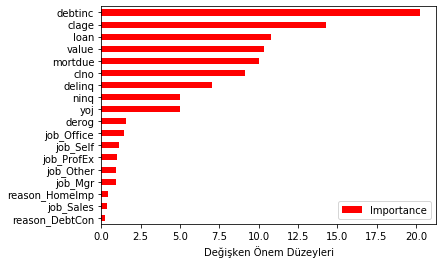

In [13]:
cf.GBMClassifierModelTuned(data)

In [11]:
#!pip install xgboost
class XGBOOST:
    def __init__(self,data):
        self.data=data
    def XGBoostRegressorModel(self,data):
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from xgboost import XGBRegressor
        import xgboost as xgb
        xgb_model = XGBRegressor().fit(X_train, y_train)
        y_pred = xgb_model.predict(X_test)
        print("XGBoost Regressor Model MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    
    def XGBoostRegressorModelTuned(self,data):
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from xgboost import XGBRegressor
        import xgboost as xgb
        
        xgb_grid = {'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
                     'n_estimators':[100, 200, 500, 1000],
                     'max_depth': [2,3,4,5,6],
                     'learning_rate': [0.1, 0.01, 0.5]}
        xgb = XGBRegressor()

        xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


        xgb_cv.fit(X_train, y_train)
        params=xgb_cv.best_params_
        xgb_tuned = XGBRegressor(colsample_bytree =params['colsample_bytree'], 
                         learning_rate =params['learning_rate'], 
                         max_depth = params['max_depth'], 
                         n_estimators = params['n_estimators']) 

        xgb_tuned = xgb_tuned.fit(X_train,y_train)
        y_pred = xgb_tuned.predict(X_test)
        print("XGBoost Regressor Model Tuned MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        
    def XGBoostClassifierModel(self,data):
        from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from xgboost import XGBClassifier
        import xgboost as xgb
        xgb_model = XGBClassifier().fit(X_train, y_train)
        y_pred = xgb_model.predict(X_test)
        print("XGBoost Classifier Model MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        print(classification_report(y_test, y_pred))
    
    def XGBoostClassifierModelTuned(self,data):
        from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
        from xgboost import XGBClassifier
        import xgboost as xgb
        
        xgb_grid = {'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
                     'n_estimators':[100, 200, 500, 1000],
                     'max_depth': [2,3,4,5,6],
                     'learning_rate': [0.1, 0.01, 0.5]}
        xgb = XGBClassifier()

        xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


        xgb_cv.fit(X_train, y_train)
        params=xgb_cv.best_params_
        xgb_tuned = XGBClassifier(colsample_bytree =params['colsample_bytree'], 
                         learning_rate =params['learning_rate'], 
                         max_depth = params['max_depth'], 
                         n_estimators = params['n_estimators']) 

        xgb_tuned = xgb_tuned.fit(X_train,y_train)
        y_pred = xgb_tuned.predict(X_test)
        print("XGBoost Classifier Model Tuned MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        print(classification_report(y_test, y_pred))

In [2]:
!pip install lightgbm
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
#!conda install -c conda-forge lightgbm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
class LightGBM:
    def __init__(self,data):
        self.data=data
    def LGBMRegressorModel(self,data):
        lgbm = LGBMRegressor()
        lgbm_model = lgbm.fit(X_train, y_train)
        y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)
        print("LightGBM Regressor Model  MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    def LGBMRegressorModelTuned(self,data):
        lgbm_grid = {'colsample_bytree': [0.4, 0.5,0.6],
                    'learning_rate': [0.01, 0.1, 0.5,1],
                    'n_estimators': [ 100, 200, 500],
                    'max_depth': [6,7,8] }
        lgbm = LGBMRegressor()
        lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)
        lgbm_cv_model.fit(X_train,y_train)
        params=lgbm_cv_model.best_params_
        lgbm_tuned = LGBMRegressor(learning_rate = params['learning_rate'],
                           max_depth = params['max_depth'], 
                           n_estimators = params['n_estimators'],
                          colsample_bytree = params['colsample_bytree'])

        lgbm_tuned = lgbm_tuned.fit(X_train,y_train)
        y_pred = lgbm_tuned.predict(X_test)
        print("LightGBM Regressor Model Tuned MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        
        def LGBMClassifierModel(self,data):
            lgbm_model = LGBMClassifier().fit(X_train, y_train)
            y_pred = lgbm_model.predict(X_test)
            print("LightGBM Regressor Modeli Accuracy Score: ", accuracy_score(y_test, y_pred))
            print(classification_report(y_test, y_pred))
        
        def LGBMClassifierModelTuned(self,data):
            lgbm_grid = {'colsample_bytree': [0.4, 0.5,0.6],
                        'learning_rate': [0.01, 0.1, 0.5,1],
                        'n_estimators': [ 100, 200, 500],
                        'max_depth': [6,7,8] }
            lgbm = LGBMClassifier()
            lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)
            lgbm_cv_model.fit(X_train,y_train)
            params=lgbm_cv_model.best_params_
            lgbm_tuned = LGBMClassifier(learning_rate = params['learning_rate'],
                           max_depth = params['max_depth'], 
                           n_estimators = params['n_estimators'],
                          colsample_bytree = params['colsample_bytree'])

            lgbm_tuned = lgbm_tuned.fit(X_train,y_train)
            y_pred = lgbm_tuned.predict(X_test)
            print("LightGBM Classifier Model Tuned MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
            print(classification_report(y_test, y_pred))

In [13]:
#!pip install catboost
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
class CatBoost:
    def __init__(self,data):
        self.data=data
    def CatBoostRegressor(self,data):
        catb = CatBoostRegressor()
        catb_model = catb.fit(X_train, y_train)
        y_pred = catb_model.predict(X_test)
        print("CatBoost Regressor Modeli MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        
    def CatBoostRegressorTuned(self,data):
        catb_grid = {
            'iterations': [200,500,1000],
            'learning_rate': [0.01, 0.03, 0.05, 0.1],
            'depth': [3,4,5,6,7,8] }
        catb = CatBoostRegressor()
        catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)
        catb_cv_model.fit(X_train, y_train)
        params=catb_cv_model.best_params_
        catb_tuned = CatBoostRegressor(iterations = params['iterations'], 
                               learning_rate = params['learning_rate'], 
                               depth = ['depth'])

        catb_tuned = catb_tuned.fit(X_train,y_train)
        y_pred = catb_tuned.predict(X_test)
        print("CatBoost Regressor Tuned Modeli MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        
    def CatBoostClassifier(self,data):
        catb = CatBoostClassifier()
        catb_model = catb.fit(X_train, y_train)
        y_pred = catb_model.predict(X_test)
        print("CatBoost Classifier Modeli MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        print(classification_report(y_test, y_pred))
        
    def CatBoostClassifierTuned(self,data):
        catb_grid = {
            'iterations': [200,500,1000],
            'learning_rate': [0.01, 0.03, 0.05, 0.1],
            'depth': [3,4,5,6,7,8] }
        catb = CatBoostClassifier()
        catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)
        catb_cv_model.fit(X_train, y_train)
        params=catb_cv_model.best_params_
        catb_tuned = CatBoostClassifier(iterations = params['iterations'], 
                               learning_rate = params['learning_rate'], 
                               depth = ['depth'])

        catb_tuned = catb_tuned.fit(X_train,y_train)
        y_pred = catb_tuned.predict(X_test)
        print("CatBoost Classifier Tuned Modeli MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        print(classification_report(y_test, y_pred))

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
class KNN:
    def __init__(self,data):
        self.data=data
    def KNNRegressor(self,data):
        knn_model = KNeighborsRegressor().fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)
        print("KNN Modeli MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        RMSE = [] 

        for k in range(10):
            k = k+1
            knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
            y_pred = knn_model.predict(X_train) 
            rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
            RMSE.append(rmse) 
            print("k =" , k , "için RMSE değeri: ", rmse)
    def KNNRegressorTuned(self,data):
        knn_params = {'n_neighbors': np.arange(1,30,1)}
        knn = KNeighborsRegressor()
        knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
        knn_cv_model.fit(X_train, y_train)
        knn_cv_model.best_params_["n_neighbors"]
        RMSE = [] 
        RMSE_CV = []
        for k in range(10):
            k = k+1
            knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
            y_pred = knn_model.predict(X_test) 
            rmse = np.sqrt(mean_squared_error(y_test,y_pred)) 
            rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
            RMSE.append(rmse) 
            RMSE_CV.append(rmse_cv)
            print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )
        knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
        knn_tuned.fit(X_train, y_train)
        print("KNN Modeli Tuned MSE: ",np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test))))
        
        
    def KNNClassifier(self,data):
        knn_model = KNeighborsClassifier().fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)
        print("KNN Classifier Modeli MSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
        print(classification_report(y_test, y_pred))
       
    def KNNClassifierTuned(self,data):
        knn_params = {'n_neighbors': np.arange(1,30,1)}
        knn = KNeighborsClassifier()
        knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
        knn_cv_model.fit(X_train, y_train)
        knn_cv_model.best_params_["n_neighbors"]
       
        
        RMSE = [] 
        RMSE_CV = []
        for k in range(10):
            k = k+1
            knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
            y_pred = knn_model.predict(X_test) 
            rmse = np.sqrt(mean_squared_error(y_test,y_pred)) 
            rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
            RMSE.append(rmse) 
            RMSE_CV.append(rmse_cv)
            print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )
        knn_tuned = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
        knn_tuned.fit(X_train, y_train)
        print("KNN Classifier Modeli Tuned MSE: ",np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test))))
        print(classification_report(y_test, knn_tuned.predict(X_test)))

In [6]:
cf=KNN(data)
cf.KNNClassifier(data)
cf.KNNClassifierTuned(data)

KNN Classifier Modeli MSE:  0.27789876353139326
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       466
           1       0.50      0.10      0.17        39

    accuracy                           0.92       505
   macro avg       0.71      0.55      0.56       505
weighted avg       0.90      0.92      0.90       505

k = 1 için RMSE değeri:  0.323960638117511 RMSE_CV değeri:  0.35801824699239154
k = 2 için RMSE değeri:  0.27431282279994723 RMSE_CV değeri:  0.31060577877479284
k = 3 için RMSE değeri:  0.2918021844529015 RMSE_CV değeri:  0.3179670669304857
k = 4 için RMSE değeri:  0.2814390178921167 RMSE_CV değeri:  0.3137948021852354
k = 5 için RMSE değeri:  0.27789876353139326 RMSE_CV değeri:  0.3169379024648549
k = 6 için RMSE değeri:  0.26699649569399087 RMSE_CV değeri:  0.3084875610873944
k = 7 için RMSE değeri:  0.26699649569399087 RMSE_CV değeri:  0.3074265694761016
k = 8 için RMSE değeri:  0.2706793799547229 RMSE_CV değeri: 

In [2]:
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
class SV:
    def __init__(self,data):
        self.data=data
    def SVRModel(self,data):
        svr_model = SVR("linear").fit(X_train, y_train)
        y_pred = svr_model.predict(X_test)
        print("SVR Modeli MSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    def SVRModelTuned(self,data):
        svr_params = {"C": np.arange(0.1,2,0.1)}
        svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)
        svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)
        y_pred = svr_tuned.predict(X_test)
        print("SVR Tuned Modeli MSE : ",np.sqrt(mean_squared_error(y_test, y_pred)))
        
    def SVCModel(self,data):
        svm_model = SVC(kernel = "linear").fit(X_train, y_train)
        y_pred = svm_model.predict(X_test)
        print("SVC Model Accuracy Score : ",accuracy_score(y_test, y_pred))
        print(classification_report(y_test,y_pred))
    def SVCModelTuned(self,data):
        svc_params = {"C": np.arange(1,10)}

        svc = SVC(kernel = "linear")

        svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

        svc_cv_model.fit(X_train, y_train)
        svc_tuned = SVC(kernel = "linear",  C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)
        y_pred = svc_tuned.predict(X_test)
        print("SVC Model Accuracy Score : ",accuracy_score(y_test, y_pred))
        print(classification_report(y_test,y_pred))
        

In [3]:

cf=SV(data)
cf.SVCModel(data)

In [ ]:
cf.SVCModelTuned(data)